In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audio_file = "audio/youve-been-acting.wav"

In [3]:
ipd.Audio(audio_file)

<h2>Extracting Short-Time Fourier Transform</h2>

In [18]:
#load audio files with librosa
audio, sr = librosa.load(audio_file)

In [19]:
FRAME_SIZE = 2048 #SAMPLE SIZE
HOP_SIZE = 512 #SAMPLES

In [20]:
S_audio = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [21]:
S_audio.shape #(frequency, number of frames)

(1025, 85)

In [22]:
type(S_audio[0][0])

numpy.complex64

<h2>Calculating Spectrogram</h2>

In [23]:
Y_audio = np.abs(S_audio) ** 2

In [24]:
Y_audio.shape

(1025, 85)

In [25]:
type(Y_audio[0][0])

numpy.float32

<h2>Visualizing Spectrogram</h2>

In [26]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis="time",
                            y_axis=y_axis)
    plt.colorbar(format="%+2.f")

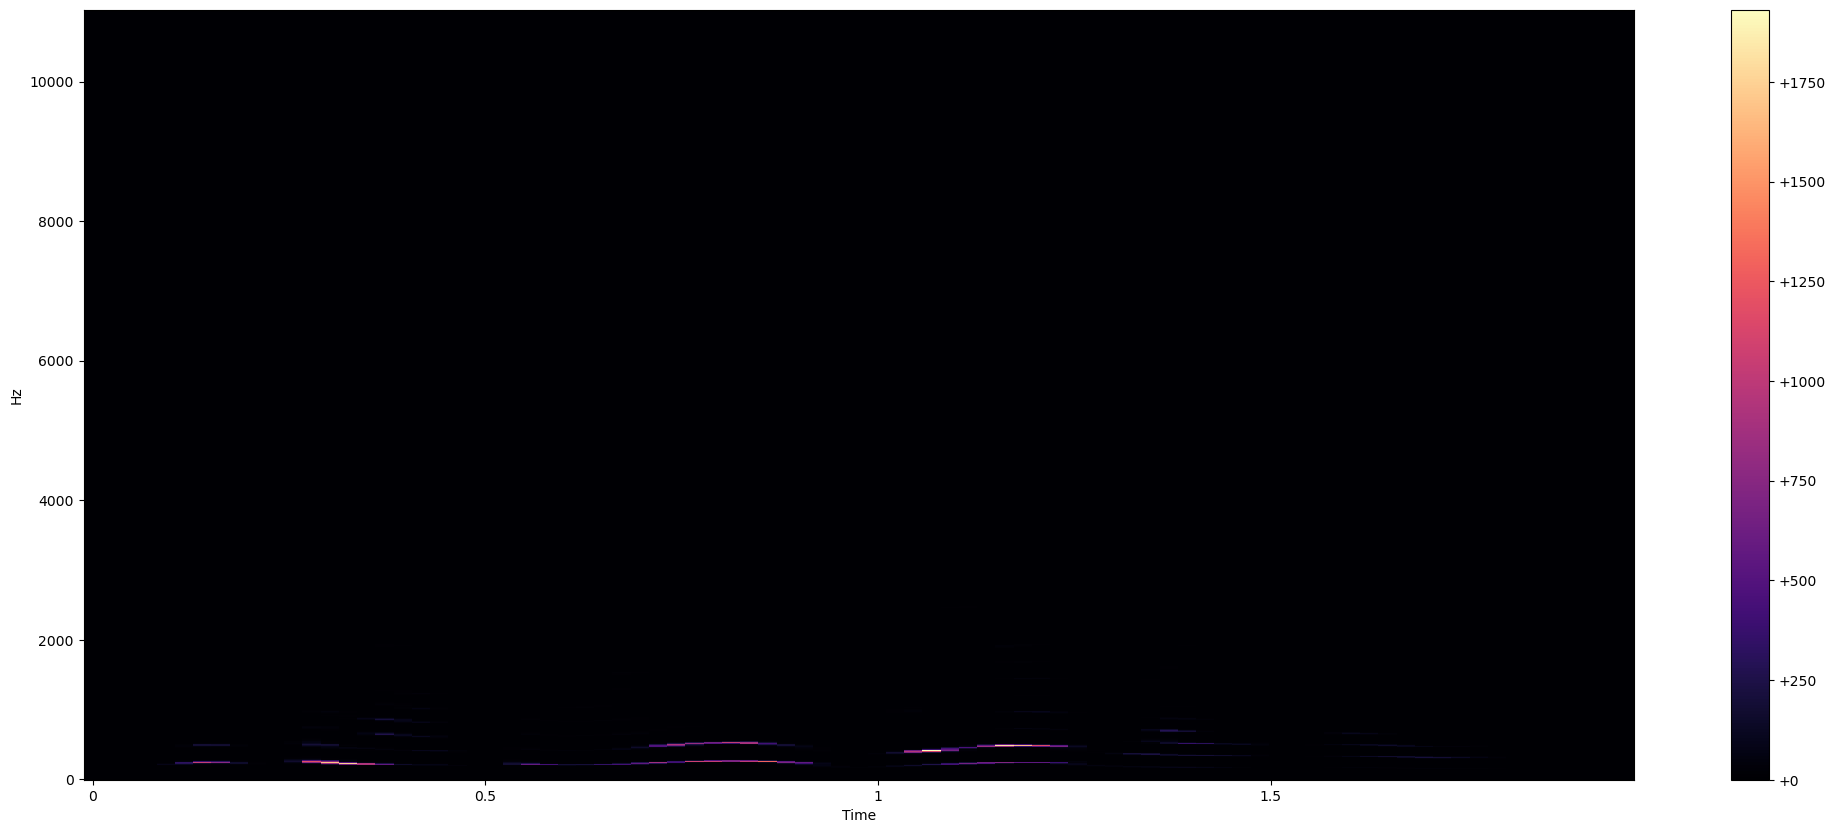

In [27]:
plot_spectrogram(Y_audio, sr, HOP_SIZE)

<h2>Log-Amplitude Spectrogram</h2>

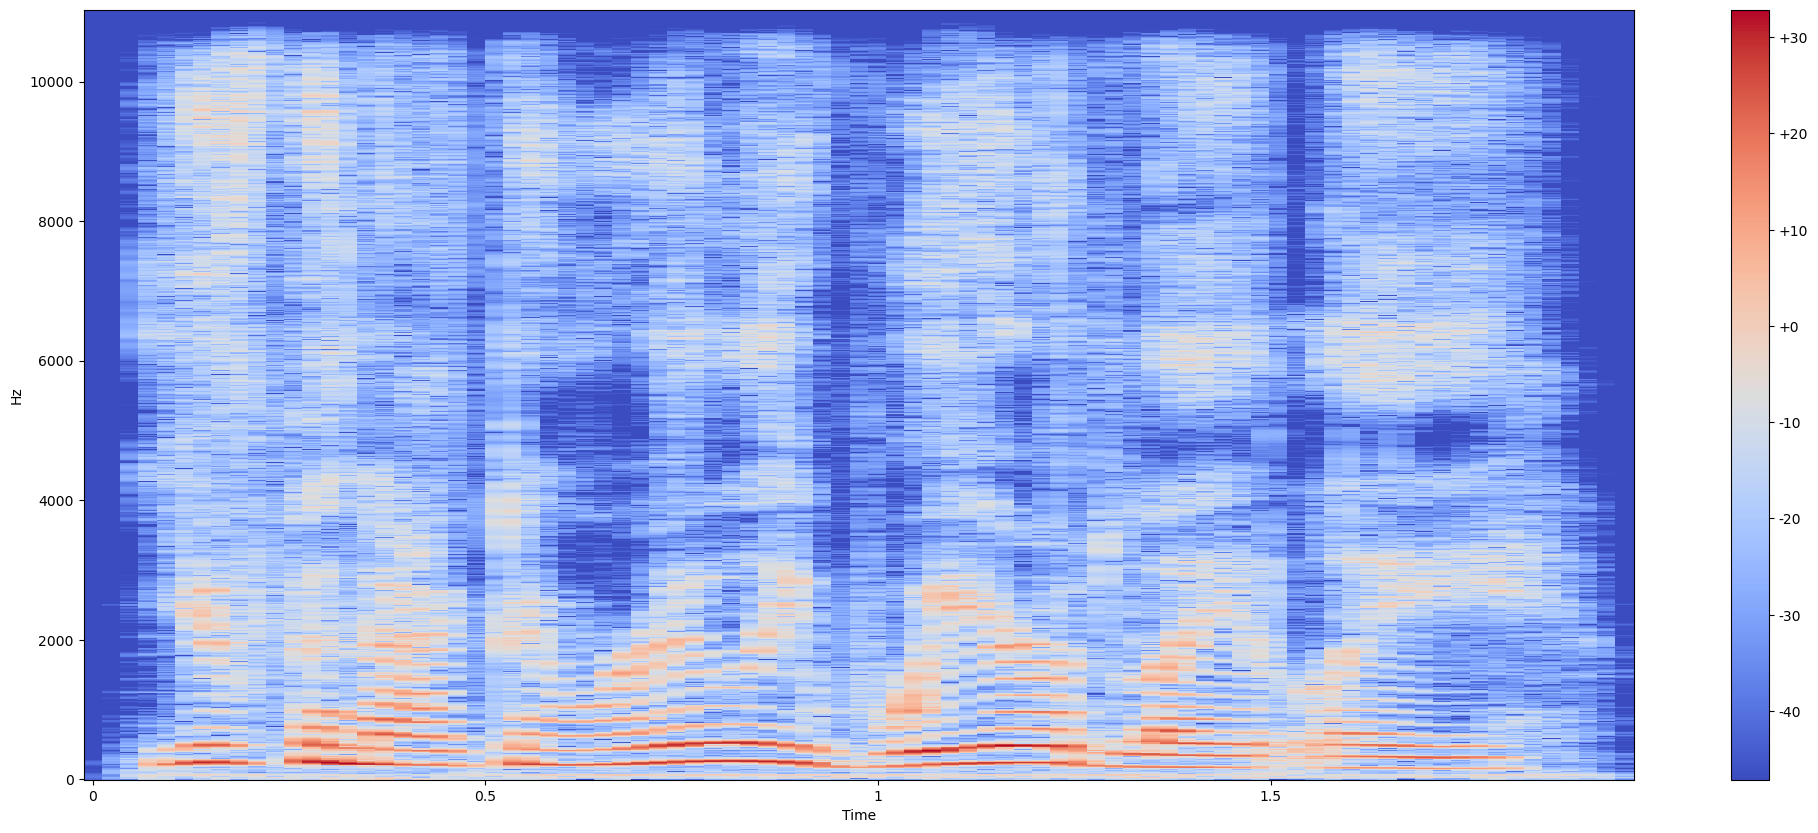

In [29]:
Y_log_audio = librosa.power_to_db(Y_audio)
plot_spectrogram(Y_log_audio, sr, HOP_SIZE)

<h2>Log-Frequency Spectrogram</h2>

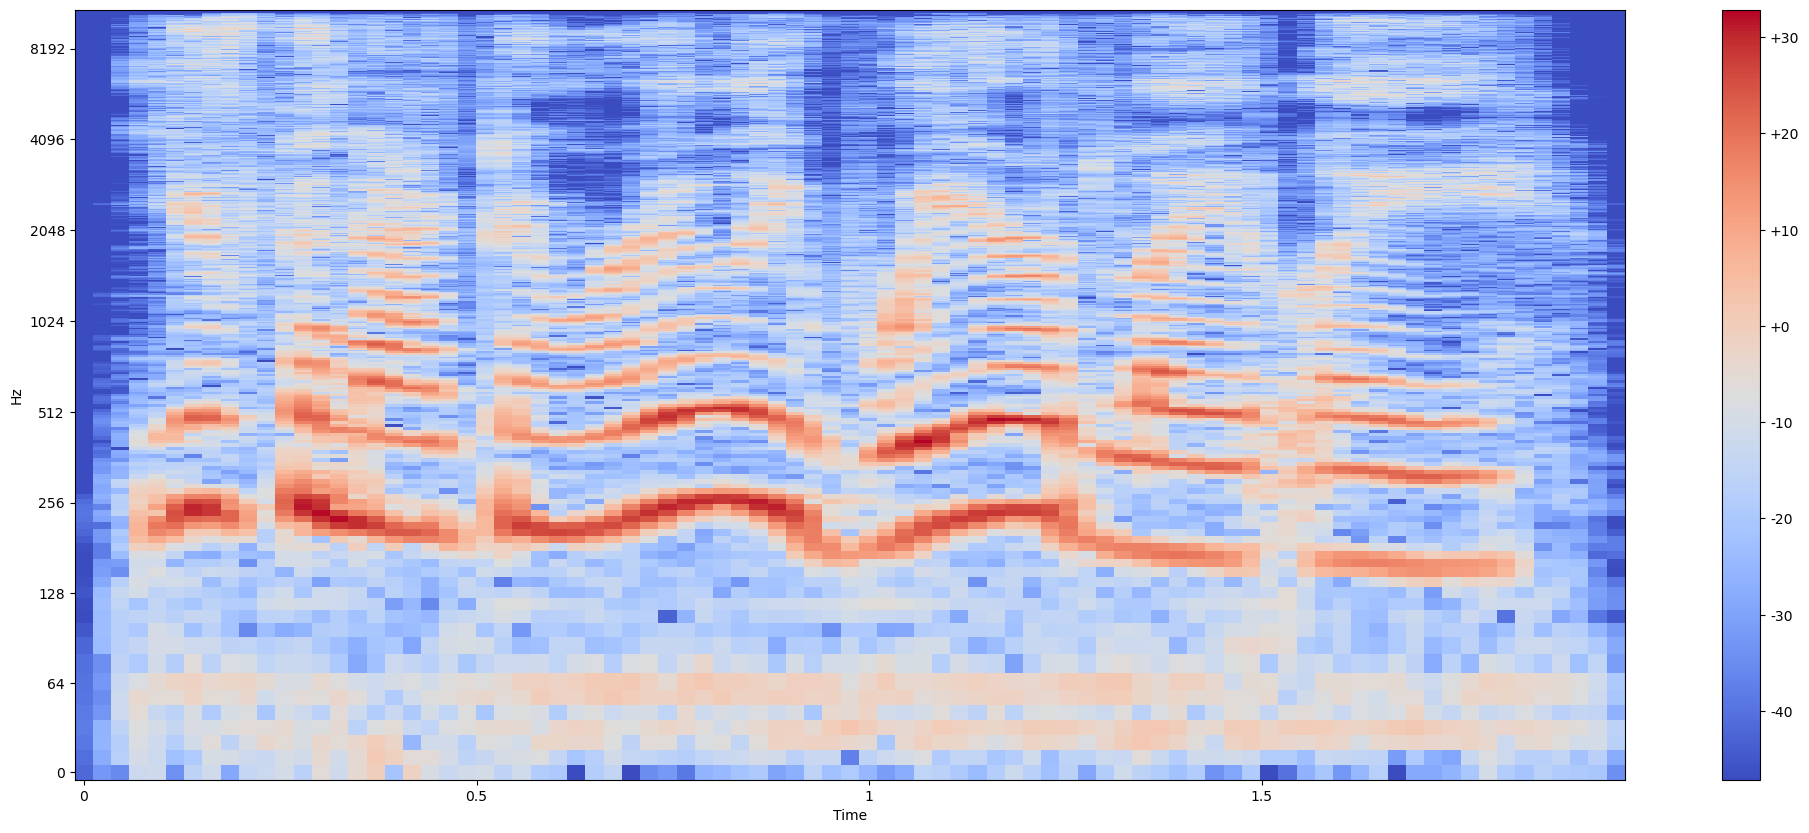

In [31]:
plot_spectrogram(Y_log_audio, sr, HOP_SIZE, y_axis="log")